In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset Loading and preprocessing

SEntFIN

In [ ]:
import pandas as pd
data = pd.read_csv('/content/SEntFiN.csv')
data.tail(7)

,S No.,Title,Decisions,Words
10746,10747,"Gram, masoor decline on subdued demand","{""Gram"": ""negative"", ""masoor"": ""negative""}",6
10747,10748,"Jeera, pepper decline on subdued demand","{""Jeera"": ""negative"", ""pepper"": ""negative""}",6
10748,10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6
10749,10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6
10750,10751,Rupee slips against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10751,10752,Rupee weak against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10752,10753,Australia shares flat; energy drags,"{""Australia shares"": ""neutral"", ""energy"": ""neu...",5


In [ ]:
headlineList = data["Title"].tolist()
sentimentEntityDict = [eval(e) for e in data["Decisions"]]


In [ ]:
headline_to_classify = headlineList[2]

In [ ]:
inputs = tokenizer(headline_to_classify, return_tensors="pt", truncation=True, padding=True)

In [ ]:
import torch
with torch.no_grad():
    outputs = model(**inputs)

predicted_class = outputs.logits.argmax().item()

In [ ]:
sentiment_labels = ["negative", "neutral", "positive"]
sentiment_label = sentiment_labels[predicted_class]
print(f"Headline: {headline_to_classify}")
print("Sentiment Classification:", sentiment_label)

Headline: Mid-cap funds can deliver more, stay put: Experts
Sentiment Classification: positive


In [ ]:
ind = 10000
print("News headline: ",headlineList[ind])
print("Entities present: ", list(sentimentEntityDict[ind].keys()))
print("Sentiments for Entities: ", list(sentimentEntityDict[ind].values()))

News headline:  Short-term investors should not look at Hindustan Unilever: Sajiv Dhawan, JV Capital Services
Entities present:  ['Hindustan Unilever', 'JV Capital Services']
Sentiments for Entities:  ['negative', 'neutral']


# Initial Model Metrics with our dataset

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
data = pd.read_csv('/content/SEntFiN.csv')
data.tail()

,S No.,Title,Decisions,Words
10748,10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6
10749,10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6
10750,10751,Rupee slips against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10751,10752,Rupee weak against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10752,10753,Australia shares flat; energy drags,"{""Australia shares"": ""neutral"", ""energy"": ""neu...",5


In [ ]:
import pandas as pd
import ast

def extract_most_frequent_sentiment(decision_str):
    decision_dict = ast.literal_eval(decision_str)

    sentiment_counts = pd.Series(list(decision_dict.values())).value_counts()

    if not sentiment_counts.empty:
        return sentiment_counts.idxmax()
    return None

In [ ]:
data['Most_Frequent_Sentiment'] = data['Decisions'].apply(extract_most_frequent_sentiment)

In [ ]:
data.head()

,S No.,Title,Decisions,Words,Most_Frequent_Sentiment
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral


**Training without fine Tuning**

In [ ]:
X = data['Title'].to_list()
y = data['Most_Frequent_Sentiment'].to_list()

for i,x in enumerate(X):
    print(i+1,")",x)

Streaming output truncated to the last 5000 lines.
5754 ) Experts see Sensex at 24,000 well before elections
5755 ) February 13, 2014: Mecklai Financial report on rupee
5756 ) February 18, 2014: Mecklai Financial report on rupee
5757 ) February 22, 2014: Mecklai Financial report on rupee
5758 ) February 25, 2014: Mecklai Financial report on rupee
5759 ) February 28, 2014: Mecklai Financial report on rupee
5760 ) February 3, 2014: Mecklai Financial report on rupee
5761 ) Fiat Chrysler crowns merger with Wall Street debut
5762 ) First State Investment raises stake in Mahindra Lifespace
5763 ) Five reasons why rupee may not appreciate much
5764 ) Flat Nifty OI data hints at trend reversal
5765 ) FMC notifies new ownership, shareholding norms for commexes
5766 ) Former Airtel executive director Krish Shankar joins Philips
5767 ) Freshdesk plans for IPO, readies for mobile era
5768 ) Fullerton appoints Rakesh Makkar as Executive Vice President
5769 ) Fully committed to reforms in OTC deriva

In [ ]:
labels = {0:'neutral', 1:'positive',2:'negative'}

sent_val = list()
for x in X:
    inputs = tokenizer(x, return_tensors="pt", padding=True)
    outputs = finbert(**inputs)[0]

    val = labels[np.argmax(outputs.detach().numpy())]
    print(x, '----', val)
    print('#######################################################')
    sent_val.append(val)

Streaming output truncated to the last 5000 lines.
Vakrangee, Petronet among top 45 stocks that hit their 52-week highs ---- neutral
#######################################################
Valuation gap with larger peer makes Stylam Industries an attractive option ---- positive
#######################################################
Varun Shipping FY11 profit up 17.45 pc at Rs 14.74 crore ---- positive
#######################################################
Venus Remedies Q2 net up 4.5 pc to Rs 11.5 cr ---- neutral
#######################################################
V-Mart Q1 net up 26.15 per cent at Rs 9.02 crore ---- positive
#######################################################
Volkswagen stocks rise 4% over better than expected third quarter earnings ---- positive
#######################################################
Watch arm's e-tail success helps KDDL tick at a faster rate ---- positive
#######################################################
Welspun India Q4 net profit j

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, sent_val))

0.6826002045940668


In [ ]:
len(sent_val)

10753

In [ ]:
data.shape

(10753, 5)

# Fine Tuning

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification


finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
data = pd.read_csv('/content/SEntFiN.csv')

In [ ]:
import pandas as pd
import ast

def extract_most_frequent_sentiment(decision_str):
    decision_dict = ast.literal_eval(decision_str)

    sentiment_counts = pd.Series(list(decision_dict.values())).value_counts()

    if not sentiment_counts.empty:
        return sentiment_counts.idxmax()
    return None

data ['Most_Frequent_Sentiment'] = data['Decisions'].apply(extract_most_frequent_sentiment)

In [ ]:
from sklearn.model_selection import train_test_split

label_mapping = {'neutral': 0, 'positive': 1, 'negative': 2}

X = data['Title'].to_list()
y = [label_mapping[sentiment] for sentiment in data['Most_Frequent_Sentiment']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
import torch
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset = SentimentDataset(test_encodings, y_test)

In [ ]:
len(train_dataset) + len(test_dataset)

10753

2 EPOCHS

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

def make_model(train_dataset, eval_dataset, learning_rate=2e-5, batch_size=32, num_epochs=2, num_layers_to_freeze=0):
    finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)
    tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

    # Freeze specified layers
    if num_layers_to_freeze > 0:
        for param in finbert.bert.parameters():
            param.requires_grad = False
        for layer in finbert.bert.encoder.layer[-num_layers_to_freeze:]:
            for param in layer.parameters():
                param.requires_grad = True

    # Set training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        run_name= '2_epochs',
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        learning_rate=learning_rate,
        eval_strategy="epoch",
        save_strategy="epoch",
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        save_total_limit=2,
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=finbert,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        compute_metrics=compute_metrics,
    )

    # Initialize lists to store accuracies for each epoch
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Perform training for one epoch
        trainer.train()

        # Evaluate on the training dataset
        train_results = trainer.evaluate(eval_dataset=train_dataset)
        train_accuracy = train_results['eval_accuracy']
        train_accuracies.append(train_accuracy)

        # Evaluate on the validation dataset
        val_results = trainer.evaluate(eval_dataset=eval_dataset)
        val_accuracy = val_results['eval_accuracy']
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1} - Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    return finbert, trainer, train_accuracies, val_accuracies

model , trainer, train_acc, val_acc = make_model(train_dataset, test_dataset)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,0.564600,0.373076,0.867503
2,0.301100,0.370265,0.865179


Epoch 1 - Training Accuracy: 0.8999069983724716, Validation Accuracy: 0.8675034867503487


Epoch,Training Loss,Validation Loss,Accuracy
1,0.444700,0.376412,0.867968
2,0.162600,0.423023,0.864249


Epoch 2 - Training Accuracy: 0.9497791211346198, Validation Accuracy: 0.8679683867968386


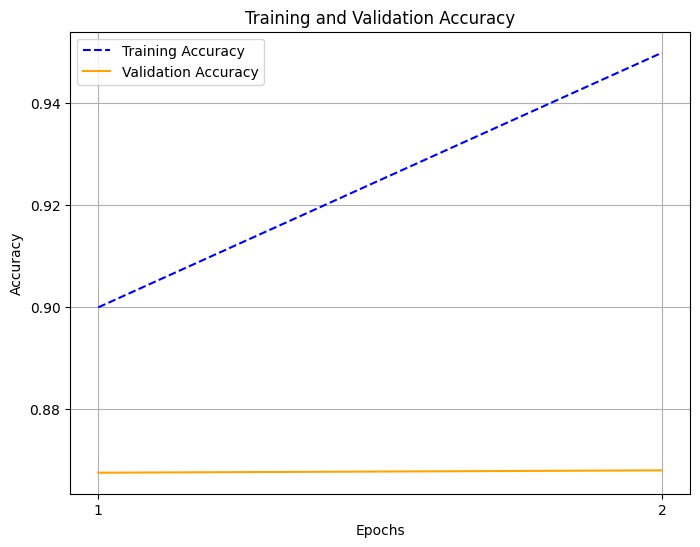

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def plot_accuracy(train_acc, val_acc):
    epochs = range(1, 3)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Training Accuracy', linestyle='--', color='blue')
    plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle='-', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xticks(epochs)
    plt.legend()
    plt.grid()
    plt.show()


plot_accuracy(train_acc, val_acc)


In [ ]:
def test_model(trainer):

    results = trainer.evaluate()
    print("Validation Loss = ", results['eval_loss'])
    print("Validation Accuracy = ", results['eval_accuracy'])


In [ ]:
test_model(trainer)

Validation Loss =  0.3764122426509857
Validation Accuracy =  0.8679683867968386


4 EPOCHS

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

def make_model(train_dataset, eval_dataset, learning_rate=2e-5, batch_size=16, num_epochs=1, num_layers_to_freeze=0):
    finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)
    tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

    # Freeze specified layers
    if num_layers_to_freeze > 0:
        for param in finbert.bert.parameters():
            param.requires_grad = False
        for layer in finbert.bert.encoder.layer[-num_layers_to_freeze:]:
            for param in layer.parameters():
                param.requires_grad = True

    # Set training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        learning_rate=learning_rate,
        eval_strategy="epoch",
        save_strategy="epoch",
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        save_total_limit=2,
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=finbert,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        compute_metrics=compute_metrics,
    )

    # Initialize lists to store accuracies for each epoch
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Perform training for one epoch
        trainer.train()

        # Evaluate on the training dataset
        train_results = trainer.evaluate(eval_dataset=train_dataset)
        train_accuracy = train_results['eval_accuracy']
        train_accuracies.append(train_accuracy)

        # Evaluate on the validation dataset
        val_results = trainer.evaluate(eval_dataset=eval_dataset)
        val_accuracy = val_results['eval_accuracy']
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1} - Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    return finbert, trainer, train_accuracies, val_accuracies

In [ ]:
model, trainer, train_accuracy, val_accuracy = make_model(train_dataset, test_dataset)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

**OVERFIT** we have to use lower epochs (2)

In [ ]:
train_accuracy

[0.9651243896768193,
 0.9991862357591258,
 0.9982562194838409,
 0.9994187398279469]

In [ ]:
val_accuracy

[0.8768014876801488,
 0.8656438865643886,
 0.8721524872152487,
 0.8707577870757787]

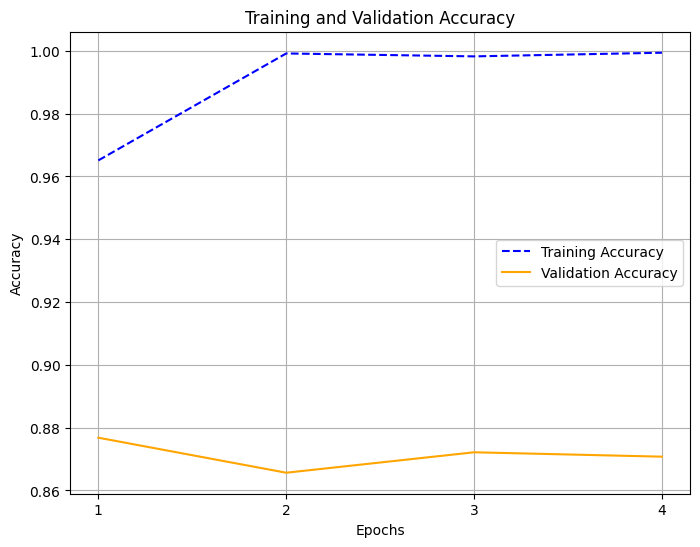

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def plot_accuracy(train_acc, val_acc):
    epochs = range(1, 5)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Training Accuracy', linestyle='--', color='blue')
    plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle='-', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xticks(epochs)
    plt.legend()
    plt.grid()
    plt.show()


plot_accuracy(train_accuracy, val_accuracy)

In [ ]:
test_model(trainer) #2 epochs

Validation Loss =  0.411775141954422
Validation Accuracy =  0.8698279869827987
